# Analysis of experiment results
This Notebook shows the results of the experiments to gain insights between the differences of a priori analysis versus posteriori analysis. 

In [1]:
# First the needed libraries are imported
import pandas as pd
import seaborn as sns

from plotters import custom_parallel_coordinates

In [2]:
figsize = (16,6)
fontsize = 11

## 1.1 Data Collection

In [3]:
# Define the subfoldername of the experiment of interest
experimentname = "nfe5000_gini"
experimentpath = f"../outputs/{experimentname}"  

In [4]:
# The dataframe with the optimization results is read 
opt_results = pd.read_csv(f"{experimentpath}/baseline_results_{experimentname}.csv").drop(columns="Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
0,0.153150,0.120177,0.562174,0.245114,-0.165570,0.048345,0.866991,0.486565,-0.127383,0.522068,...,0.632262,0.795613,0.891455,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,0.508261
1,0.083321,0.435864,0.086803,0.289718,-0.046804,0.206364,-0.116149,0.584802,-0.095820,0.137916,...,0.364745,0.619185,0.640859,9.496274,2.732896,0.000000,8.424333,1.662305,14.733976,0.501323
2,0.011414,0.887590,0.234652,0.222793,-0.790928,0.452266,-0.343934,0.226575,0.451220,0.064276,...,0.073323,0.484241,0.791037,10.887779,2.675792,0.000000,8.699732,1.706105,15.118389,0.500448
3,0.190388,0.003307,0.300802,0.320025,-0.508660,0.063393,-0.267097,0.699670,-0.850204,0.522512,...,0.851467,0.259093,0.438976,7.909469,2.243587,0.000000,7.660719,1.465703,12.003565,0.505960
4,0.151387,0.125475,0.125361,0.059499,0.036707,0.705182,0.524686,0.347013,0.450511,0.836309,...,0.930877,0.992722,0.900361,9.917207,2.711345,0.000000,7.593803,1.493755,12.740977,0.507540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.430464,0.735352,0.754527,0.408184,-0.331267,0.141363,0.160125,0.779146,0.349313,0.995816,...,0.814125,0.586391,0.711440,4.100523,1.513025,0.225000,9.186706,1.627796,10.797375,0.166749
347,0.430464,0.473388,0.754527,0.411100,-0.331267,0.092484,0.158818,0.412299,0.349313,0.897736,...,0.814125,0.598379,0.711440,4.533576,1.569193,0.395833,8.832312,1.563421,10.705488,0.166714
348,0.033928,0.013301,0.948768,0.222099,0.887850,0.053378,-0.696084,0.438356,-0.094721,0.616177,...,0.207052,0.229538,0.316459,12.650270,3.289931,0.000000,8.657225,1.431623,15.055125,0.503965
349,0.581761,0.743670,0.754393,0.396395,0.563543,0.142753,0.793179,0.214738,-0.166460,0.998243,...,0.901134,0.734791,0.919874,4.736391,1.734048,0.000000,9.242169,1.608378,7.263359,0.496996


## 1.2 Data cleaning

In [5]:
# The dataframe is split into one with the policy values and one with objective values 
n_objs= 7
pols, objs= opt_results.iloc[:, :-n_objs], opt_results.iloc[:, -n_objs:]

## 1.3 Exploratory Data Analysis

In [6]:
objs.describe()

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,6.510704,2.041653,0.203490,8.731492,1.596572,11.773395,0.294789
std,2.942439,0.611289,0.234065,1.521801,0.152347,3.643842,0.162460
min,3.596671,1.239110,0.000000,5.527805,1.259674,2.208836,0.166691
25%,4.408593,1.594668,0.000000,7.648743,1.467876,10.754605,0.166720
50%,5.195466,1.795933,0.120833,8.816031,1.599628,12.568641,0.166810
75%,7.760025,2.335881,0.362500,9.862519,1.701976,14.869079,0.501052
max,16.381157,3.835463,0.829167,11.778624,1.927701,15.127814,0.539419


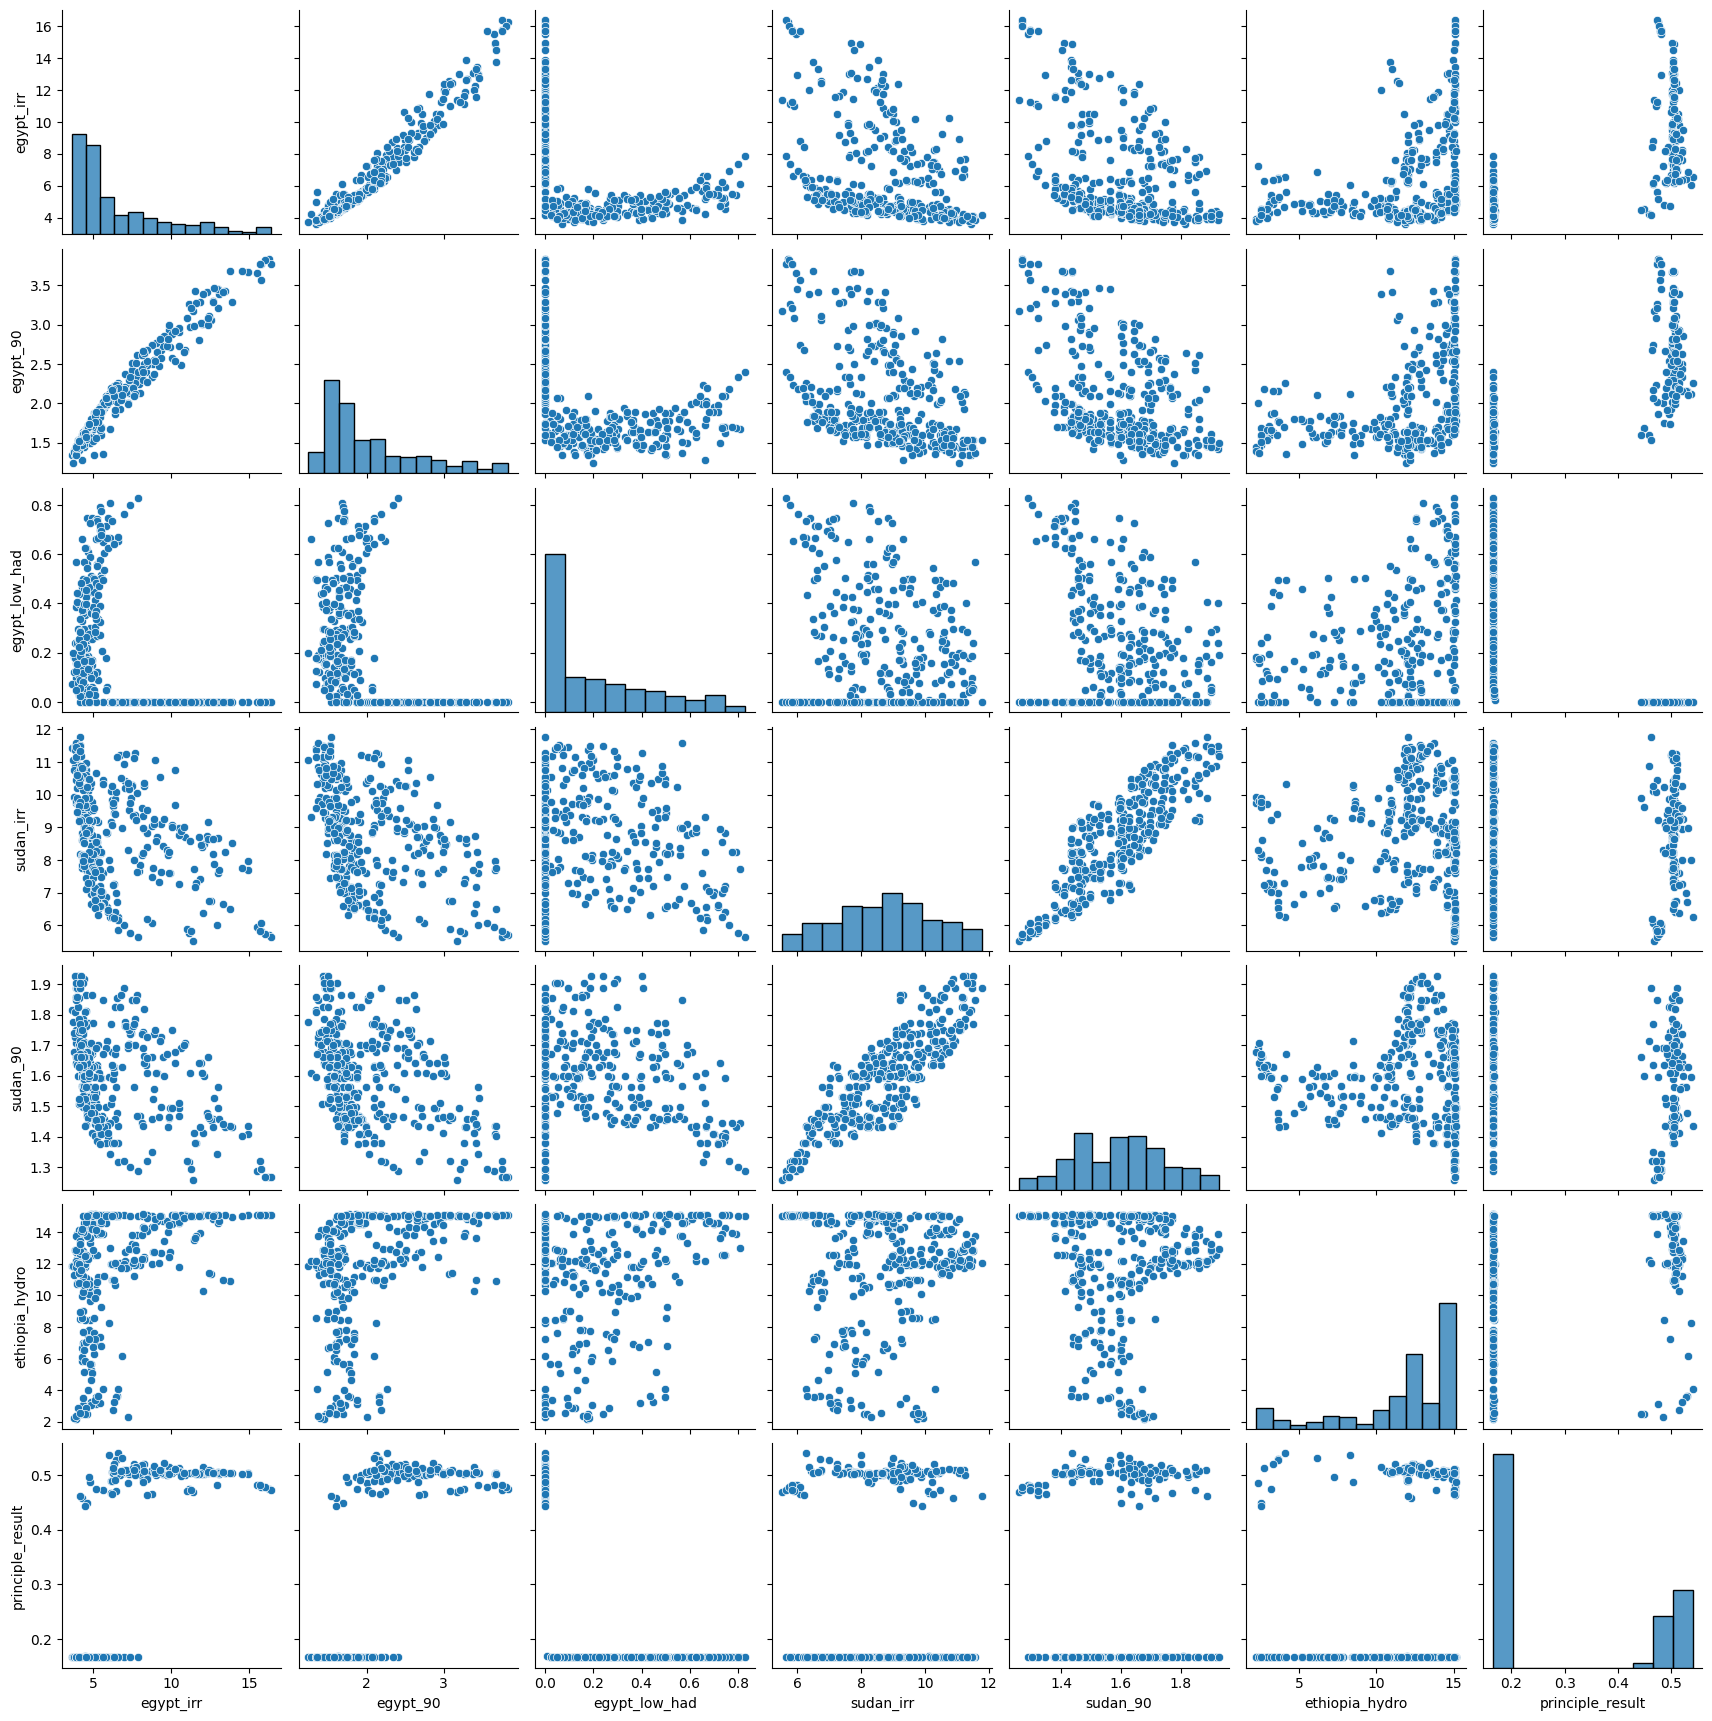

In [7]:
# a pairplot showing the relationships between the objective variables 
sns.pairplot(objs)

# 2. A priori analysis

In [8]:
axis_labels = [
        "Egypt Irr. Deficit",
        "Egypt 90$^{th}$ Irr. Deficit",
        "Egypt Low HAD",
        "Sudan Irr. Deficit",
        "Sudan 90$^{th}$ Irr. Deficit",
        "Ethiopia Hydropower",
        "Principle Result"
    ]

In [9]:
objs.columns

Index(['egypt_irr', 'egypt_90', 'egypt_low_had', 'sudan_irr', 'sudan_90',
       'ethiopia_hydro', 'principle_result'],
      dtype='object')

In [10]:
# the direction at which the objectives are optimized are put in a dictionary
directions = {'egypt_irr': 'min', 'egypt_90': 'min', 'egypt_low_had': 'min', 'sudan_irr': 'min', 'sudan_90': 'min',
       'ethiopia_hydro': 'max', 'principle_result': 'max'}

In [11]:
minmaxs = [directions[column_name] for column_name in objs.columns]
print(minmaxs)

['min', 'min', 'min', 'min', 'min', 'max', 'max']


In [12]:
objs

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
0,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,0.508261
1,9.496274,2.732896,0.000000,8.424333,1.662305,14.733976,0.501323
2,10.887779,2.675792,0.000000,8.699732,1.706105,15.118389,0.500448
3,7.909469,2.243587,0.000000,7.660719,1.465703,12.003565,0.505960
4,9.917207,2.711345,0.000000,7.593803,1.493755,12.740977,0.507540
...,...,...,...,...,...,...,...
346,4.100523,1.513025,0.225000,9.186706,1.627796,10.797375,0.166749
347,4.533576,1.569193,0.395833,8.832312,1.563421,10.705488,0.166714
348,12.650270,3.289931,0.000000,8.657225,1.431623,15.055125,0.503965
349,4.736391,1.734048,0.000000,9.242169,1.608378,7.263359,0.496996


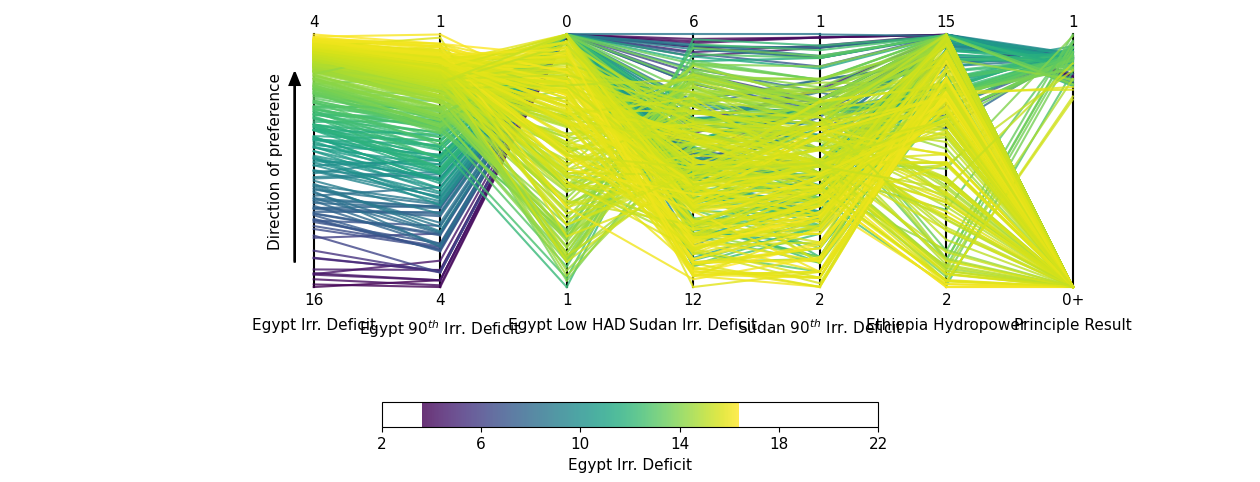

In [13]:
### basic parallel axis plot
custom_parallel_coordinates(objs, columns_axes=objs.columns, axis_labels = axis_labels, 
                            color_by_continuous=0, zorder_by=0, ideal_direction='top',
                            alpha_base = 0.8, lw_base=1.5, fontsize=fontsize, figsize=figsize,
                            minmaxs=minmaxs, 
                            colorbar_ticks_continuous=range(2,25,4),
                            save_fig_filename = None)

# 3. A Posteriori analysis